In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/Train.csv")
df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [3]:
df.nunique()

ID        107833
DATOP       1011
FLTID       1861
DEPSTN       132
ARRSTN       128
STD        81697
STA        85136
STATUS         5
AC            68
target       968
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [5]:
df.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


In [6]:
df['STA'].replace('\.',':', regex=True,inplace=True)

In [7]:
df['STD'] = pd.to_datetime(df['STD'])
df['STA'] = pd.to_datetime(df['STA'])
df['DATOP'] = pd.to_datetime(df['DATOP'])

In [8]:
df['time_diff'] = (df['STA']-df['STD']).dt.total_seconds()/60

In [9]:
df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,time_diff
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,145.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,110.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,155.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,170.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02:00:00,SCH,TU 32AIML,0.0,180.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09:00:00,SCH,UG AT7AT7,0.0,60.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12:50:00,SCH,TU 736IOK,0.0,470.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18:45:00,ATA,TU CR9ISA,0.0,45.0


In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [11]:
df['target'].mean()

48.73301308504818

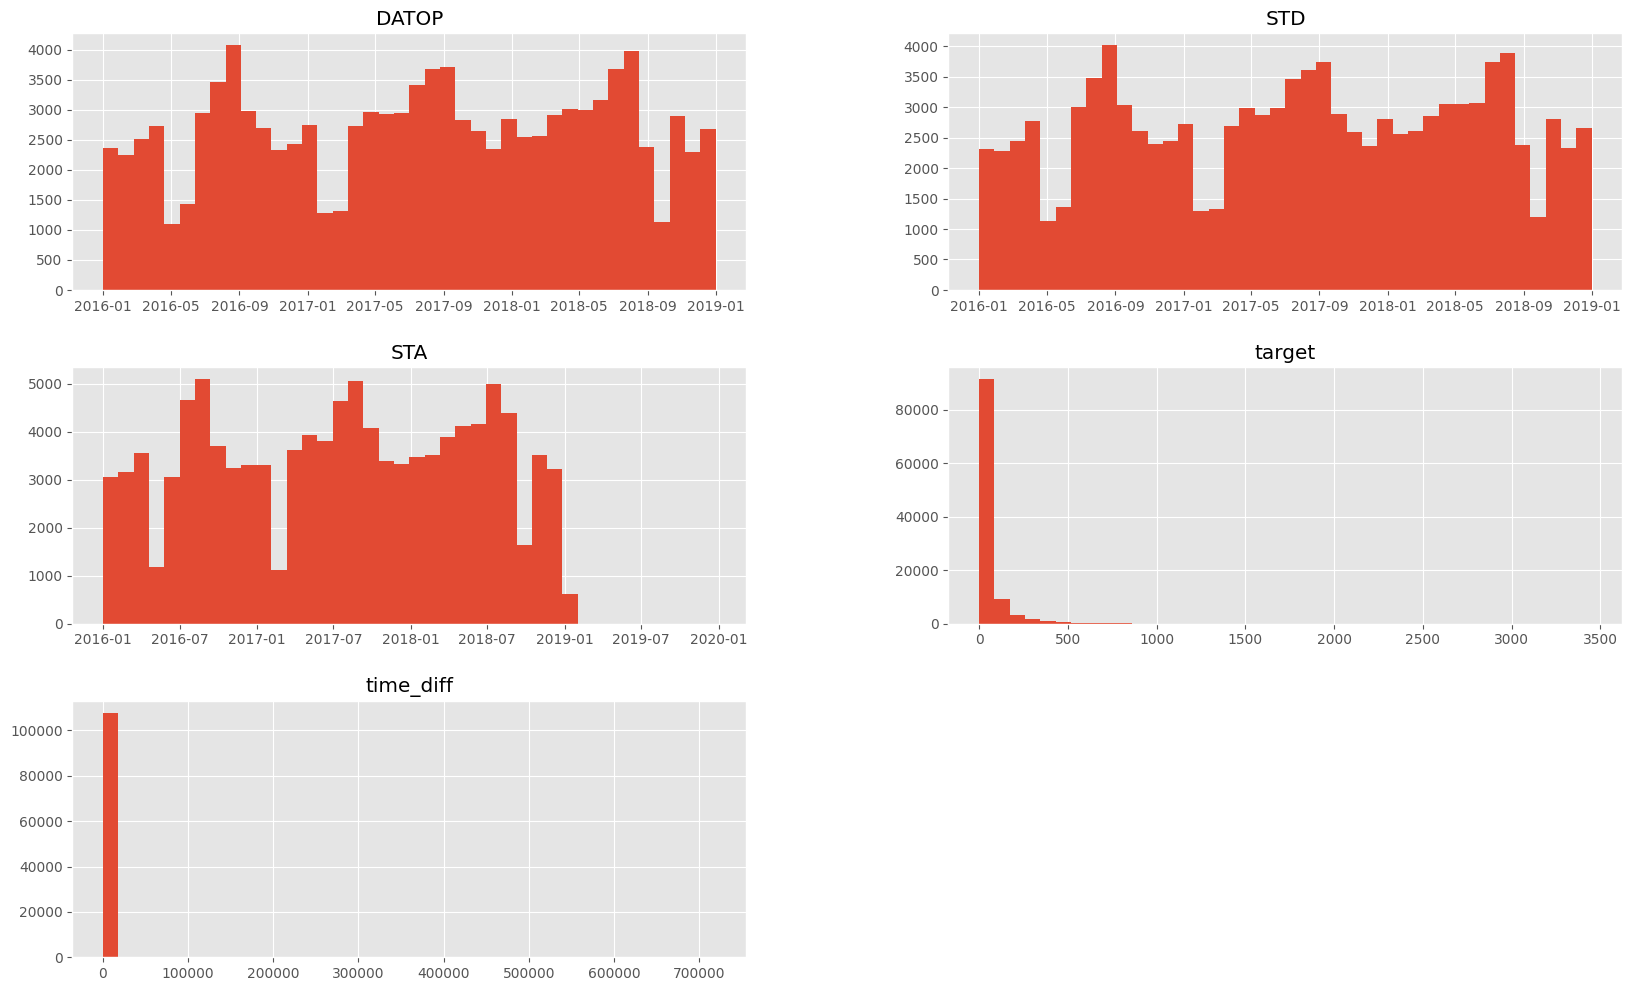

In [12]:
df.hist(bins=40, figsize=(20, 12))
plt.show()

In [13]:
df.STATUS.unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

ATA = Actual time of arrival
DEP = Departure
DEL = Delayed

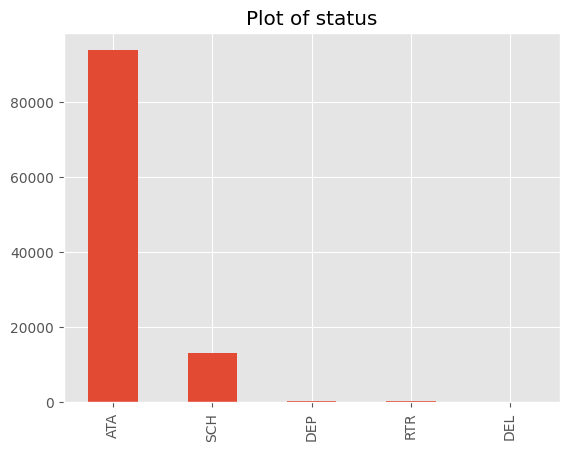

In [14]:
#plot of Status
status_count = df.STATUS.value_counts() 
#(status_count/df.shape[0]).plot(kind="bar")
status_count.plot(kind="bar")
plt.title("Plot of status");

In [15]:
df_cleaned = df.copy()

In [16]:
# Create years, month etc.
df_cleaned['hour'] = df.STD.dt.hour
df_cleaned['month'] = df.DATOP.dt.month
df_cleaned['year'] = df.DATOP.dt.year
df_cleaned['day_of_week'] = df.DATOP.dt.day_of_week # The day of the week with Monday=0, Sunday=6

In [17]:
df_cleaned['month'].value_counts()

8     13208
7     12226
6      9764
4      9621
10     9466
3      8994
12     8822
1      8640
11     7726
9      7417
5      6786
2      5163
Name: month, dtype: int64

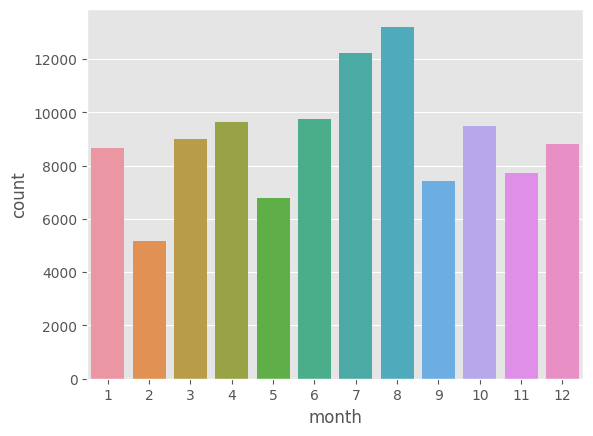

In [18]:
sns.countplot(df_cleaned['month']);

In [19]:
outcome = df.pop("target")
outcome

0         260.0
1          20.0
2           0.0
3           0.0
4          22.0
          ...  
107828      0.0
107829      0.0
107830      0.0
107831      0.0
107832      0.0
Name: target, Length: 107833, dtype: float64

In [28]:
np.array(outcome)
outcome = (outcome =="0.0").astype(int)

In [29]:
outcome.value_counts()

0    107833
Name: target, dtype: int64

In [ ]:
plt.figure()
df_cleaned.groupby('month')['target'].median().plot(kind='bar')
plt.ylabel('mean delay in minutes')

In [ ]:
#correlation 
sns.heatmap(df_cleaned.corr(),annot=True)